In [1]:
!pip install opencv-python tensorflow matplotlib numpy


# Import Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and Display the Medical Image

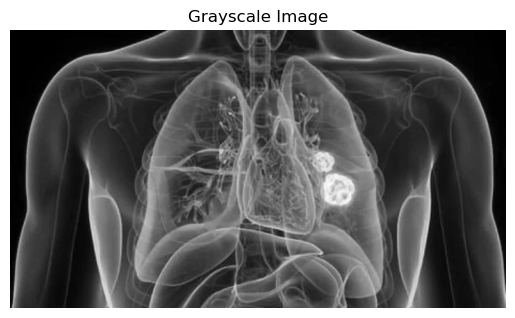

In [3]:
# Load the medical image
image_path = "lung.webp"  # Replace with the correct path
image = cv2.imread(image_path)

# Check if the image is loaded
if image is None:
    print(f"Error: Unable to load the image at {image_path}. Please check the path.")
else:
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Display the grayscale image
    plt.imshow(gray_image, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis("off")
    plt.show()


# Apply Thresholding for Segmentation

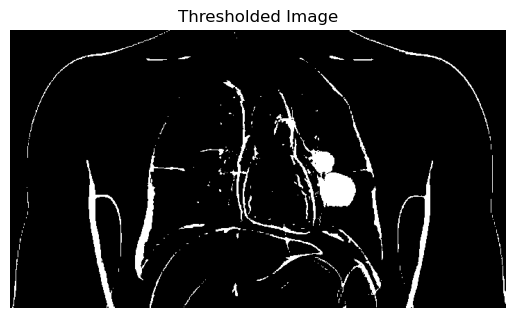

In [4]:
# Apply thresholding
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Display the thresholded image
plt.imshow(thresholded_image, cmap='gray')
plt.title("Thresholded Image")
plt.axis("off")
plt.show()


# Apply Watershed Algorithm

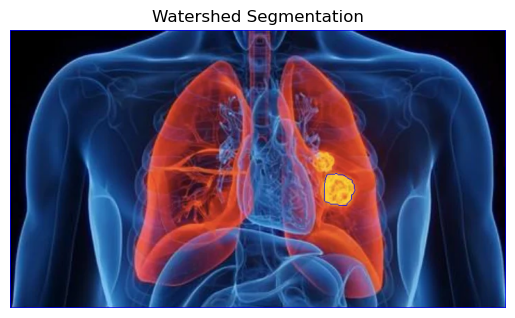

In [5]:
# Convert to binary and find sure background and foreground
kernel = np.ones((3, 3), np.uint8)
sure_bg = cv2.dilate(thresholded_image, kernel, iterations=3)
dist_transform = cv2.distanceTransform(thresholded_image, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Mark unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Markers for watershed
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
colored_image = image.copy()
markers = cv2.watershed(colored_image, markers)
colored_image[markers == -1] = [255, 0, 0]  # Boundary color

# Display the segmented image
plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.axis("off")
plt.show()


# Overlay Contours on Original Image

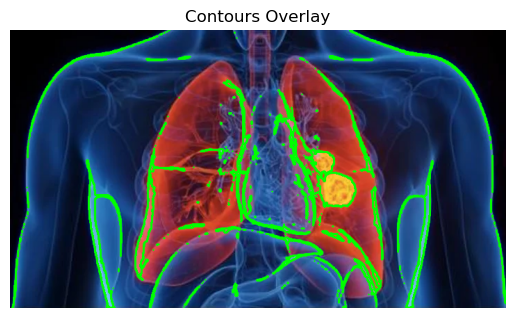

In [6]:
# Find contours
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Display the image with contours
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title("Contours Overlay")
plt.axis("off")
plt.show()


# Compare Thresholding vs. Watershed

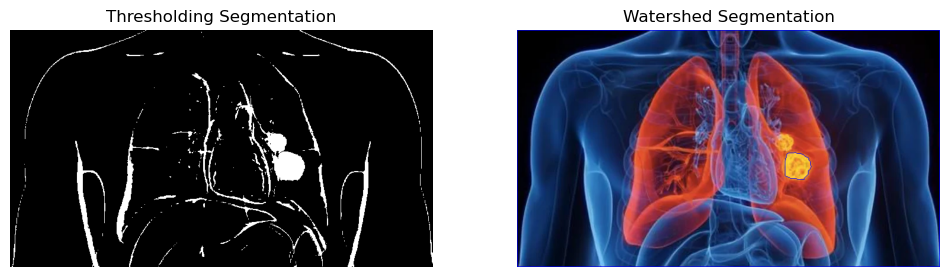

In [7]:
# Plot comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(thresholded_image, cmap='gray')
plt.title("Thresholding Segmentation")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.axis("off")

plt.show()
